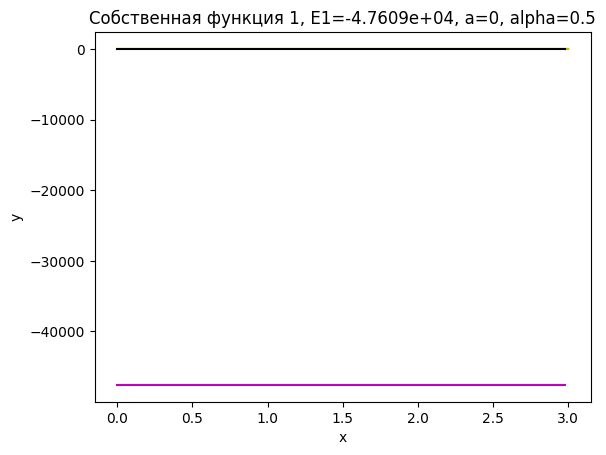

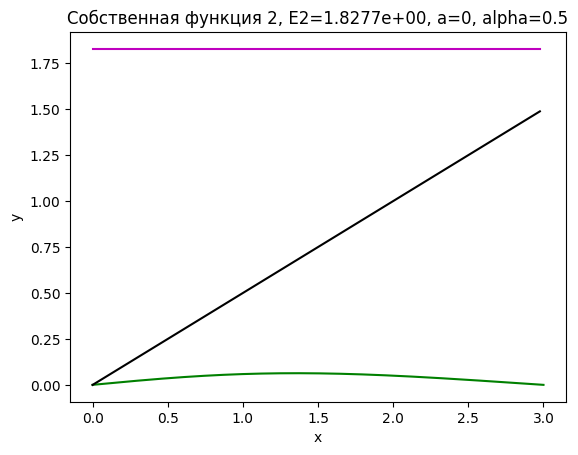

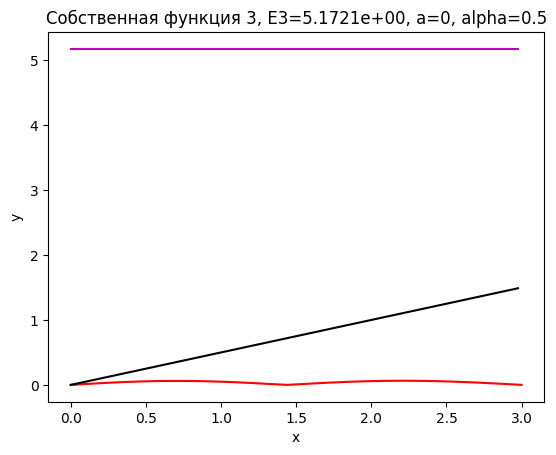

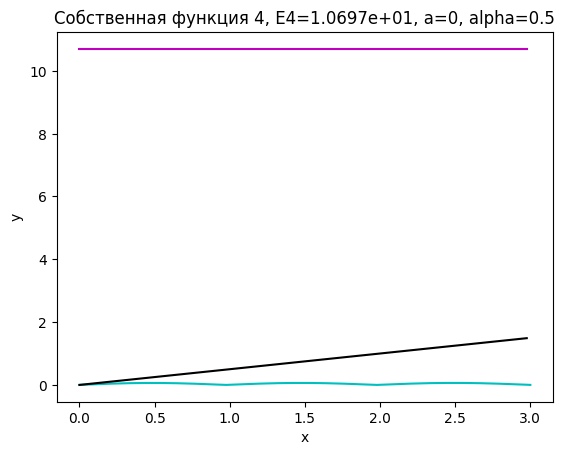

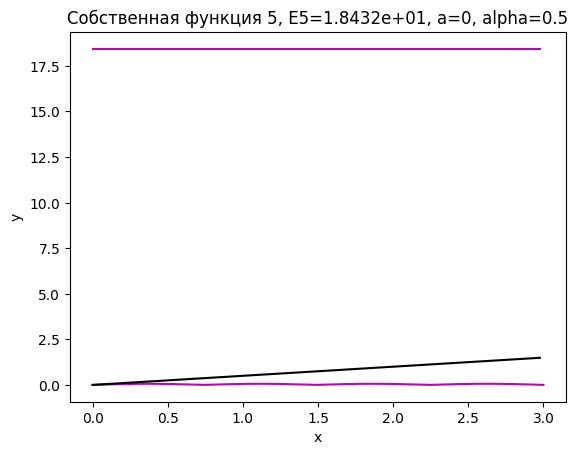

In [136]:
import numpy as np
from scipy.linalg import eig
from scipy.constants import hbar, electron_mass
import matplotlib.pyplot as plt

m = electron_mass

a = 0
alpha = 0.5

coef1 = 1
#coef1 = 2*m/hbar**2
coef2 = 1
#coef2 = hbar**2/(2*m)

neigen = 5 # число собственных значений, которые хотим найти

# Определяем функцию, задающую q(x)
def q(x):
    if x < 0: return np.inf
    elif x > a: return coef1 * alpha * (x - a)
    else : return 0

# Определяем параметры задачи
b = 3 # правый конец отрезка
N = 500 # число узлов сетки
h = b / (N+1) # шаг сетки

# Создаем матрицу для метода конечных разностей
A = np.zeros((N-2,N-2))
A[0, 0]=q(h)-2/h**2
A[0, 1]=1/h**2
A[N-3, N-3]=q((N-1)*h)-2/h**2
A[N-3, N-4]=1/h**2
for i in range(1,N-2):
    A[i,i] = 2/h**2 + q(i*h) # главая диагональ
    if i > 0:
        A[i,i-1] = -1/h**2 # диагональ слева
    if i < N-3:
        A[i,i+1] = -1/h**2 # диагональ справа

# Находим собственные значения и собственные векторы матрицы A
eigenvalues, eigenvectors = eig(A)

# Собственные значения соответствуют собственным числам дифференциального уравнения
# Собственные векторы соответствуют собственным функциям дифференциального уравнения

# Сортируем собственные значения и соответствующие им собственные векторы
idx = eigenvalues.argsort()
eigenvalues = eigenvalues[idx].real * coef2
eigenvectors = eigenvectors[:,idx]

# Выбираем первые neigen собственных значений и соответствующие им собственные векторы
eigenvalues = eigenvalues[:neigen]
eigenvectors = eigenvectors[:,:neigen]

# Нормируем собственные векторы
for i in range(neigen):
    eigenvectors[:,i] /= np.sqrt(np.sum(eigenvectors[:,i]**2))



# Построение графиков собственных функций
np.append(eigenvectors, [0, 0, 0, 0, 0])
np.insert(eigenvectors, 0,[0, 0, 0, 0, 0])
#eigenvectors.append([0, 0, 0, 0, 0])
#eigenvectors.insert(0, [0, 0, 0, 0, 0])


y = []
x = np.linspace(0, b, N-2)
x1 = []
y1 = []
for i in range(N-2):
    x1.append(i*h)
    y1.append(q(i*h))
colors = ['y', 'g', 'r', 'c', 'm'] # список цветов для каждой функции

for i in range(neigen):
    y2 = []
    for j in x1:
        y2.append(eigenvalues[i])
    plt.figure()
    plt.plot(x, np.abs(eigenvectors[:, i]), color=colors[i % len(colors)])
    plt.plot(x1, y1, color='k')
    plt.plot(x1, y2, color='m')
    plt.title(f'Собственная функция {i+1}, E{i+1}={eigenvalues[i]:.4e}, a={a}, alpha={alpha}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
#print(coef1)

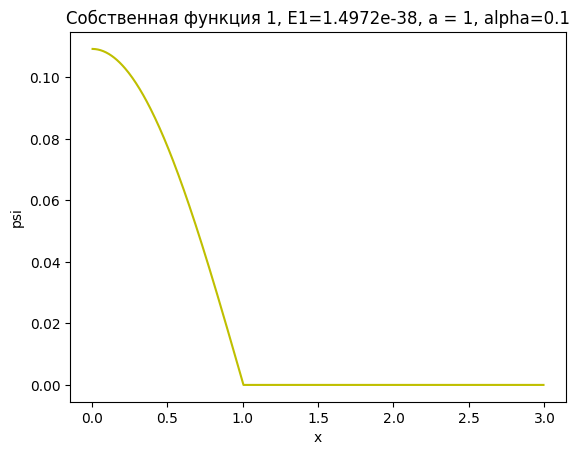

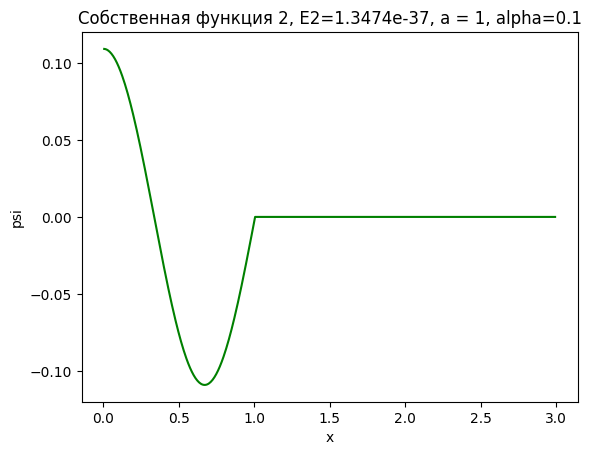

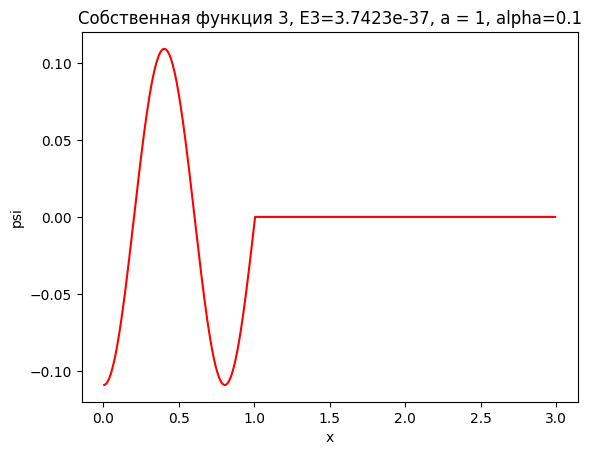

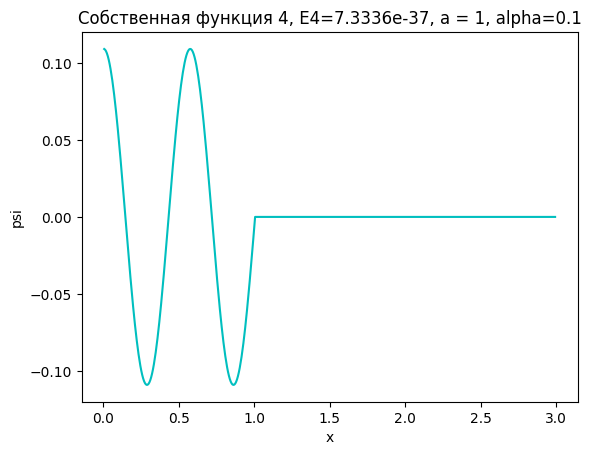

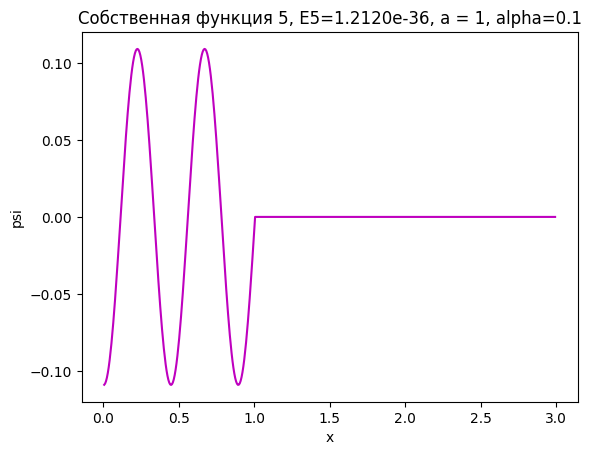

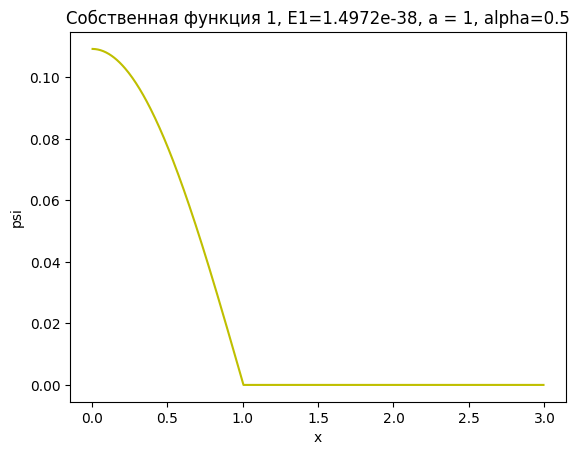

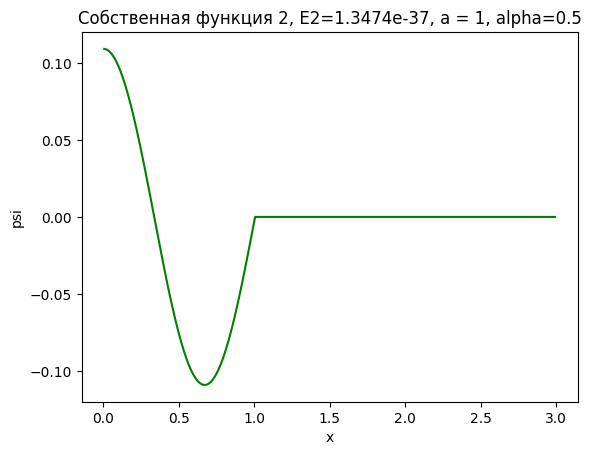

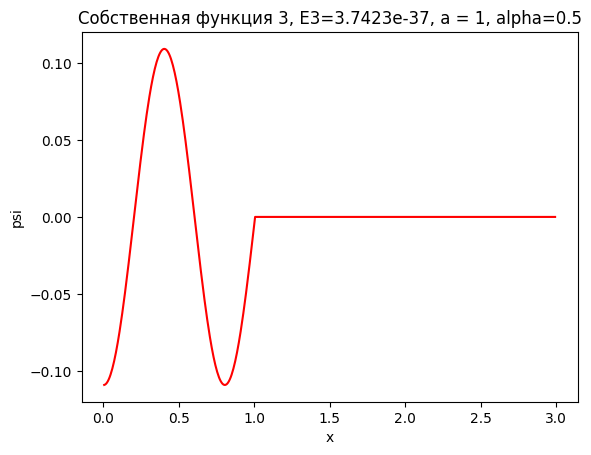

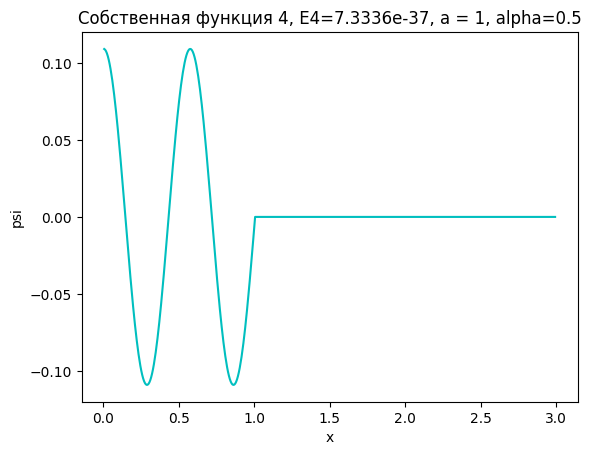

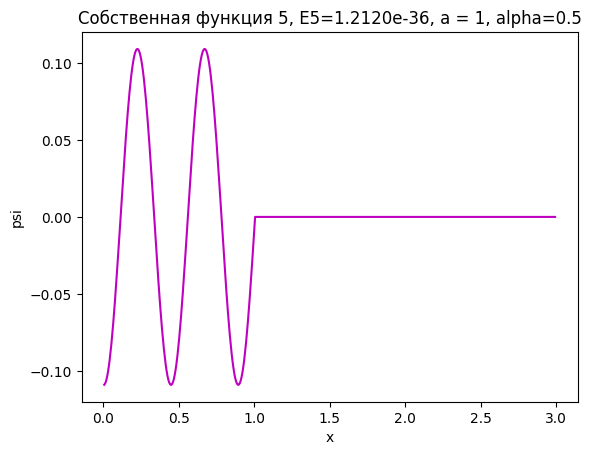

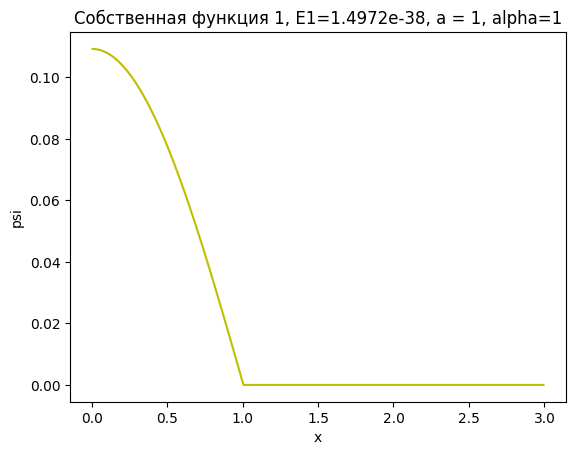

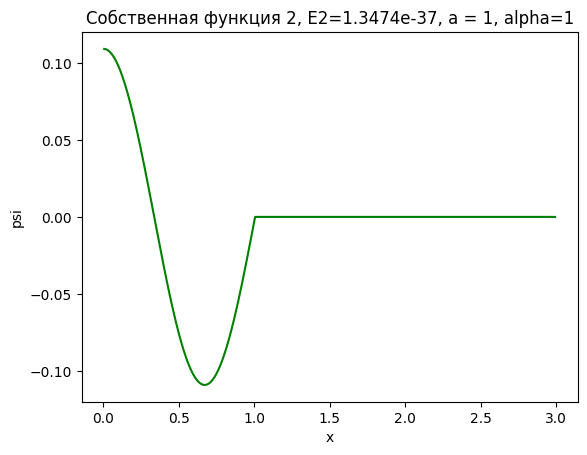

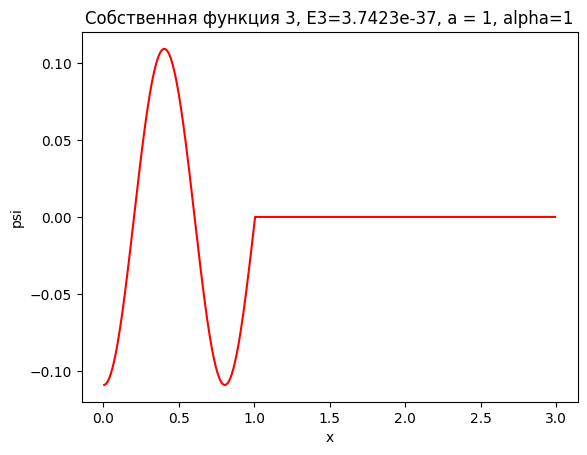

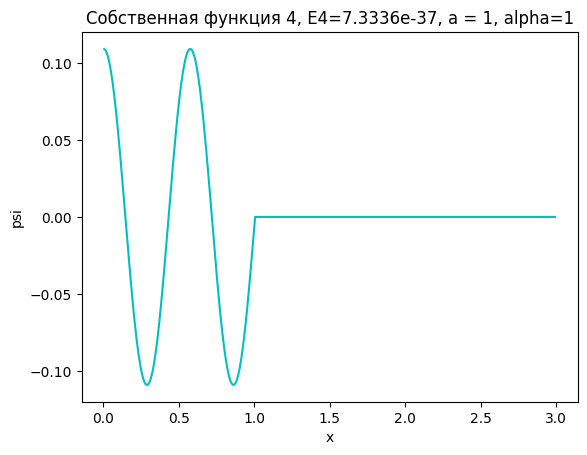

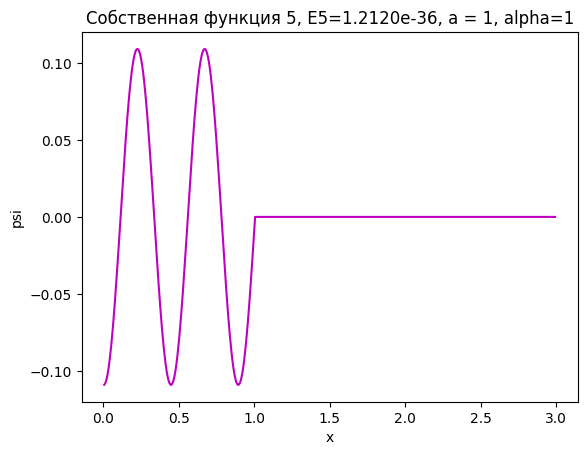

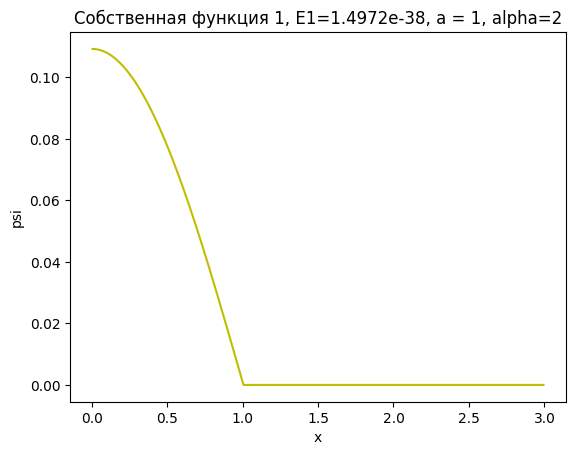

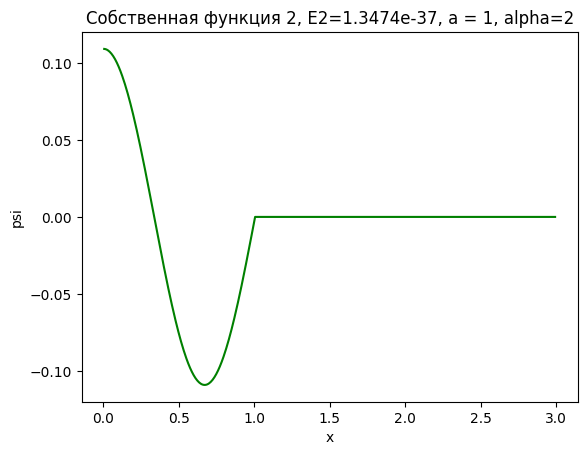

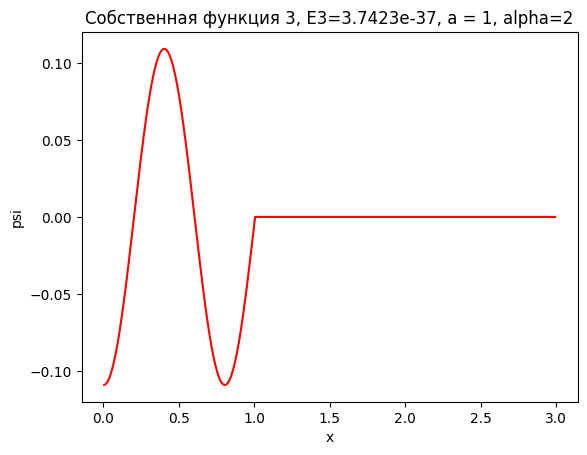

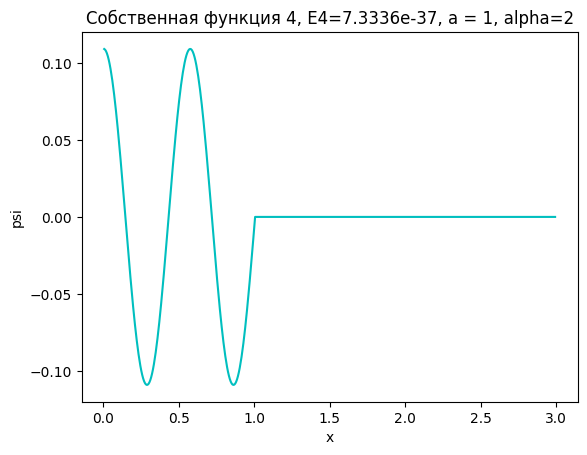

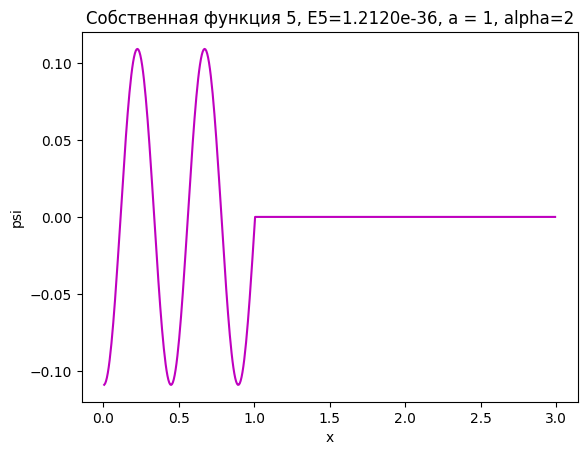

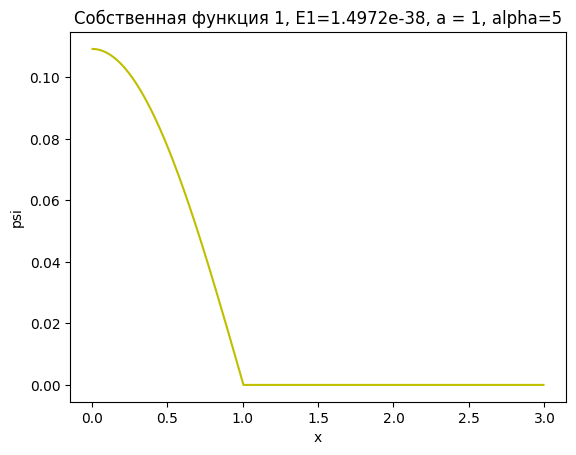

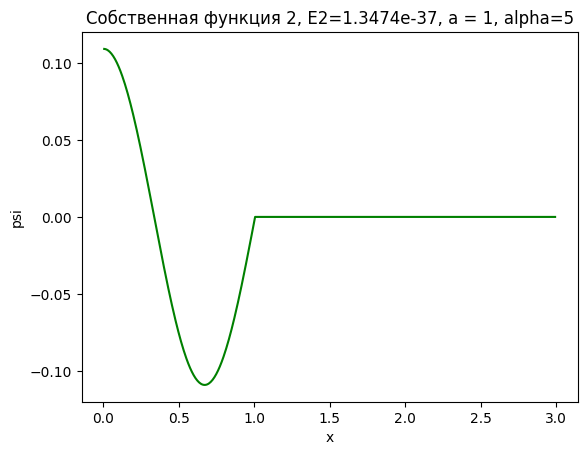

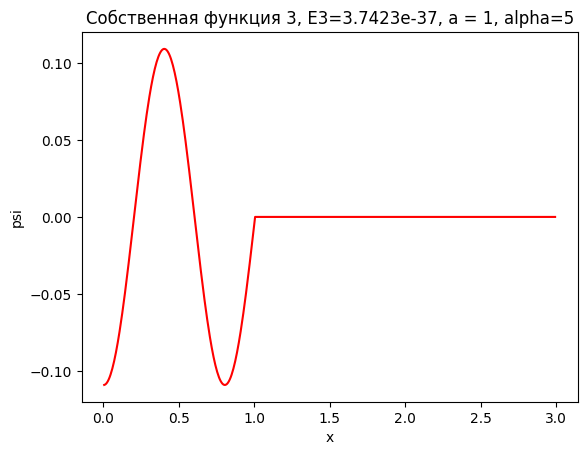

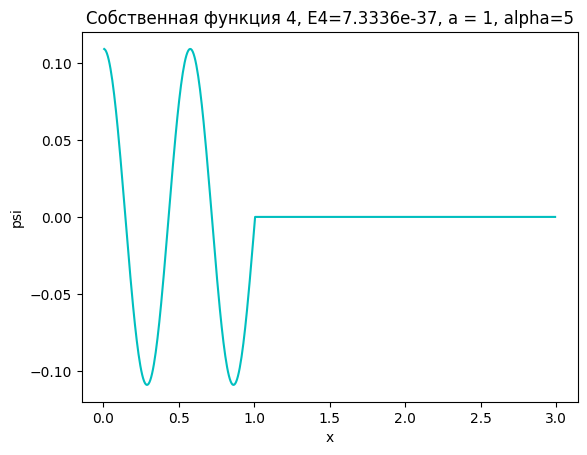

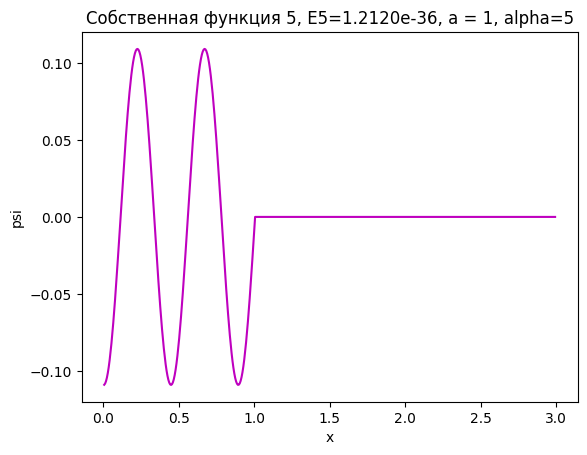

In [132]:
# Смотрим, как меняется собственное значение при фиксированном значении a и разных значениях параметра alpha
import numpy as np
from scipy.linalg import eig
from scipy.constants import hbar, electron_mass
import matplotlib.pyplot as plt

m = electron_mass

coef1 = 2*m/hbar**2
coef2 = hbar**2/(2*m)

a = 1
alpha = [0.1, 0.5, 1, 2, 5]

neigen = 5

def q(x, i):
    if x < 0: return np.inf
    elif x > a: return coef1 * alpha[i] * (x - a)
    else : return 0

b = 3 * a
N = 500
h = b / (N+1)

for k in range(5):
    A = np.zeros((N,N))
    for i in range(N):
        A[i,i] = 2/h**2 + q((i+1)*h, k)
        if i > 0:
            A[i,i-1] = -1/h**2
        if i < N-1:
            A[i,i+1] = -1/h**2

    A[0,0] = 1/h**2
    A[N-1,N-1] = 1/h**2

    eigenvalues, eigenvectors = eig(A)

    idx = eigenvalues.argsort()
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]

    eigenvalues = eigenvalues[:neigen].real * coef2
    eigenvectors = eigenvectors[:,:neigen]

    for i in range(neigen):
        eigenvectors[:,i] /= np.sqrt(np.sum(eigenvectors[:,i]**2))

    x = np.linspace(0, b, N+2)
    colors = ['y', 'g', 'r', 'c', 'm']
    for i in range(neigen):
        plt.figure()
        plt.plot(x[1:-1], eigenvectors[:,i], color=colors[i % len(colors)])
        plt.title(f'Собственная функция {i+1}, E{i+1}={eigenvalues[i]:.4e}, a = {a}, alpha={alpha[k]}')
        plt.xlabel('x')
        plt.ylabel('psi')
        plt.show()

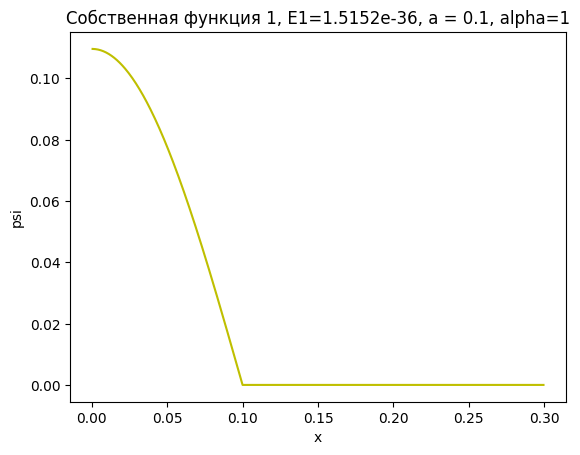

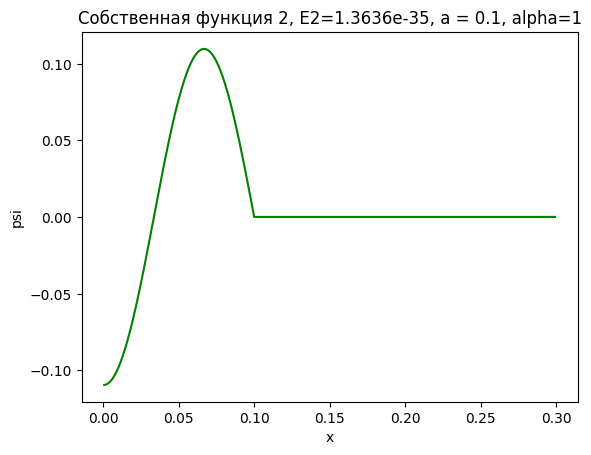

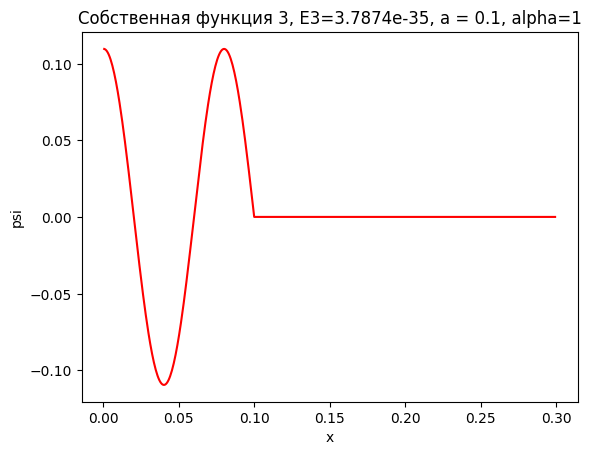

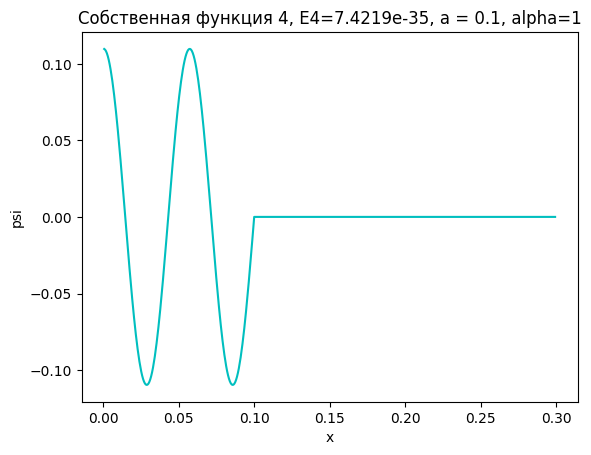

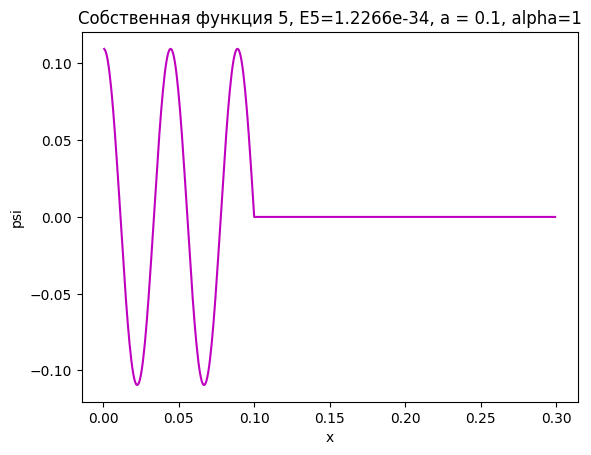

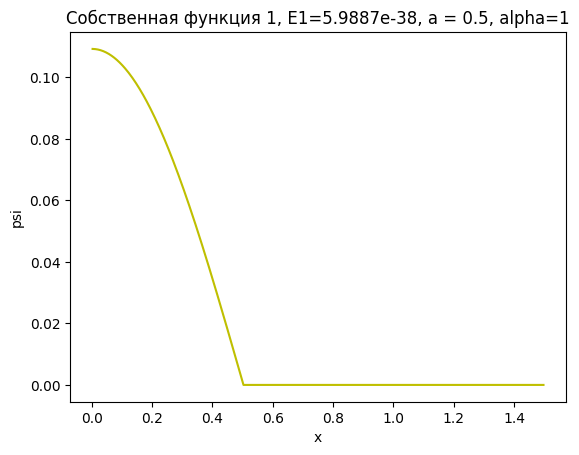

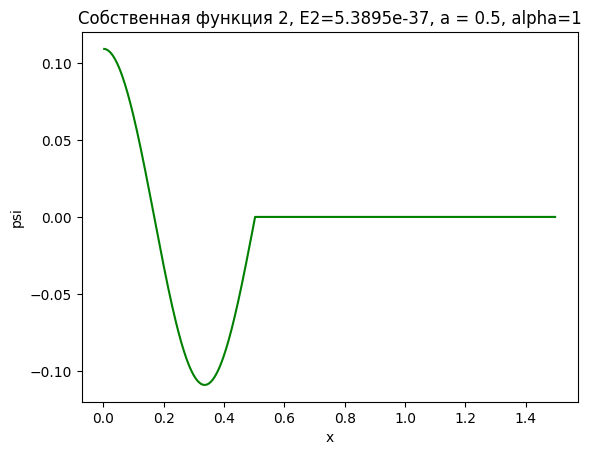

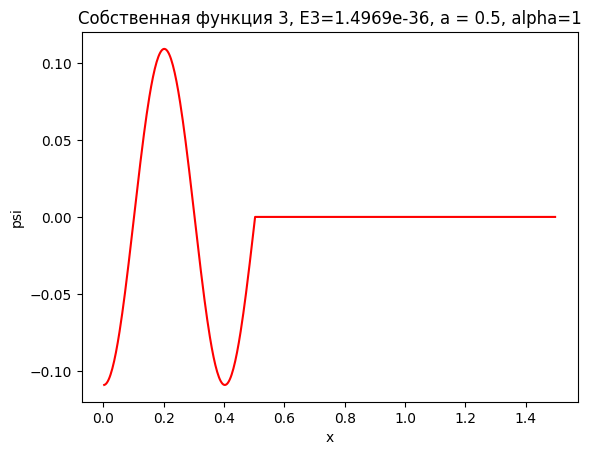

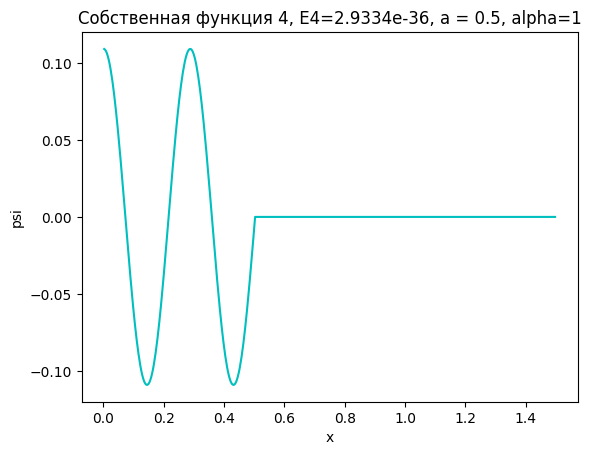

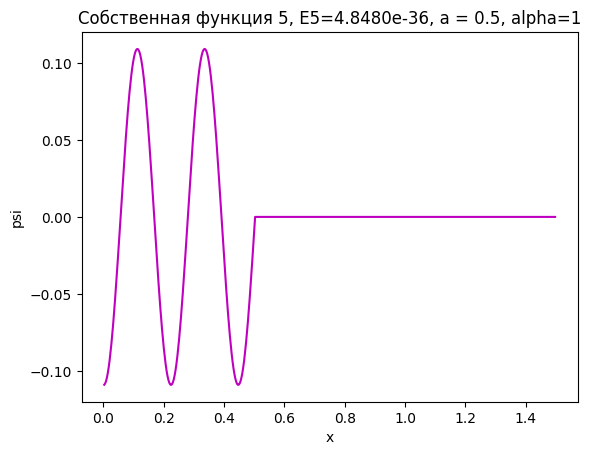

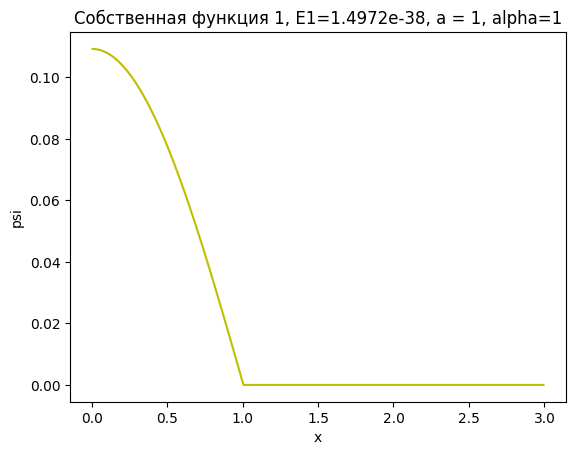

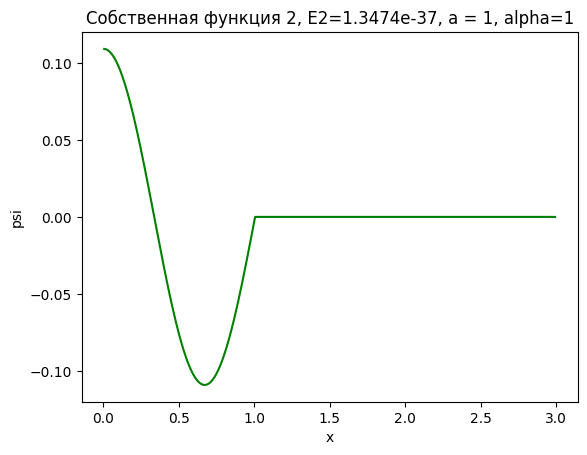

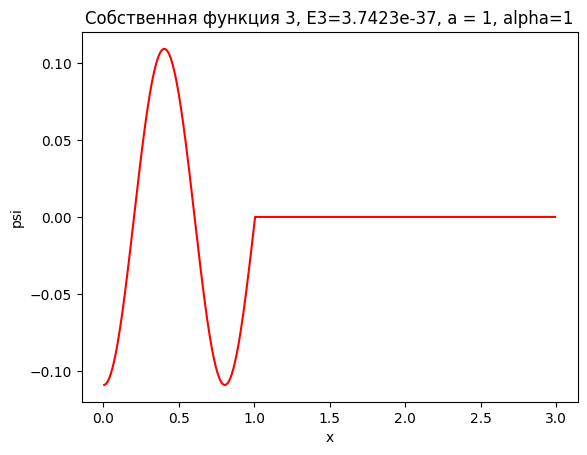

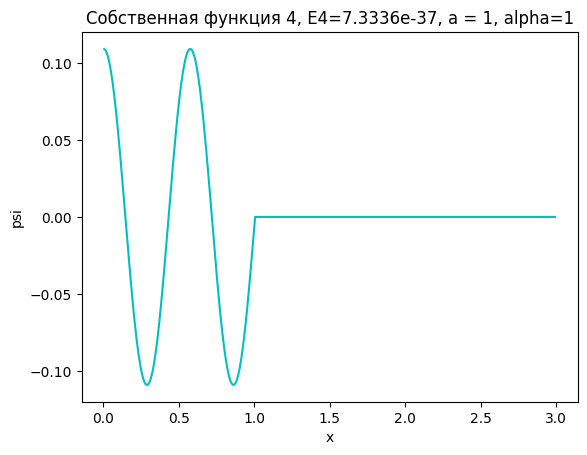

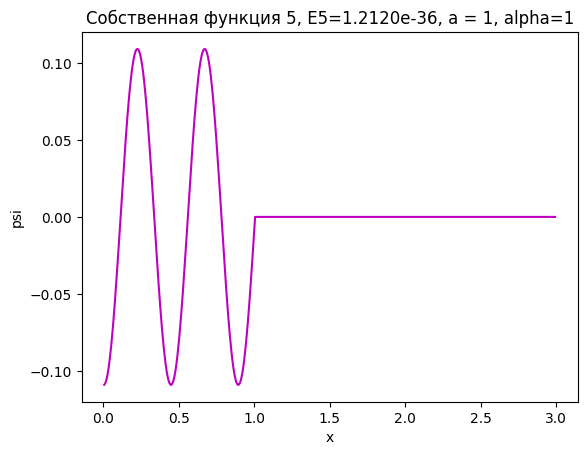

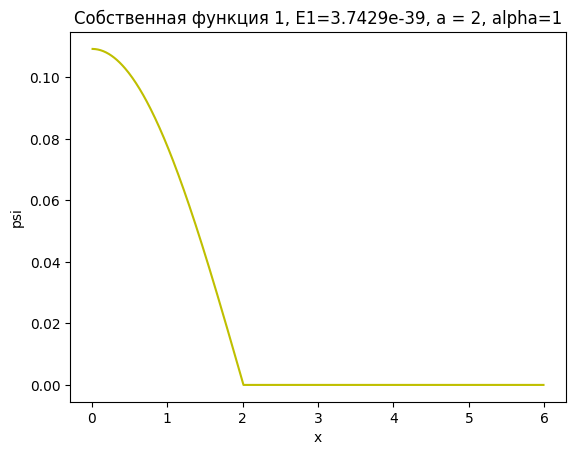

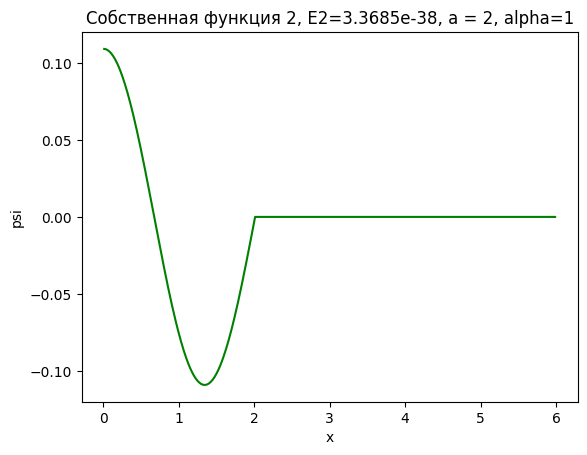

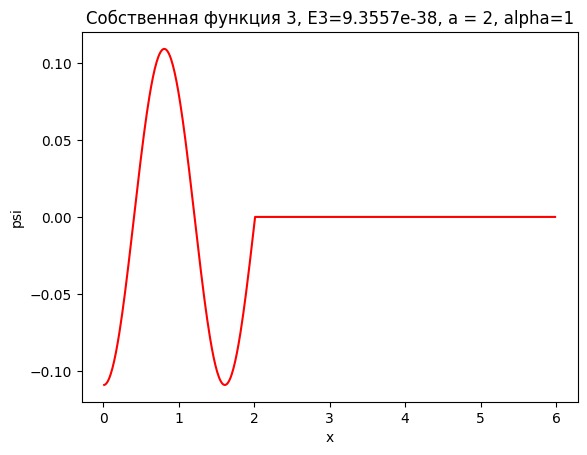

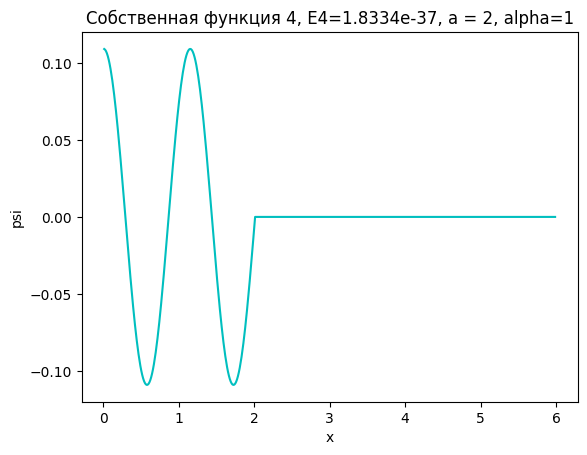

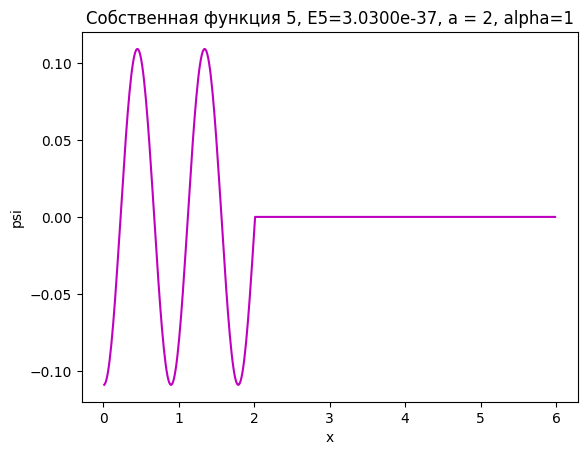

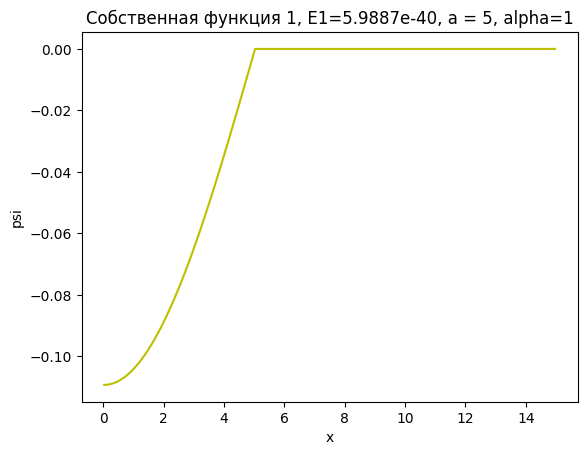

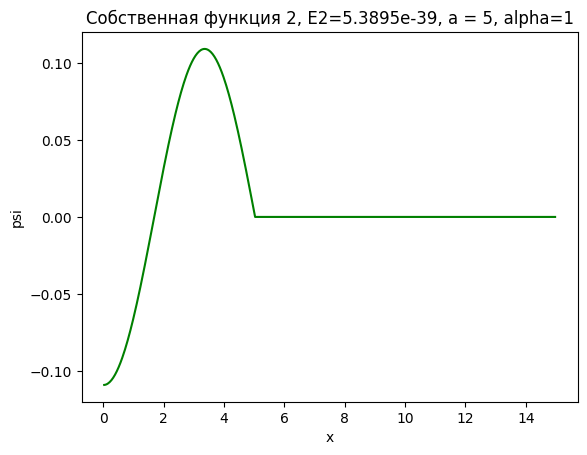

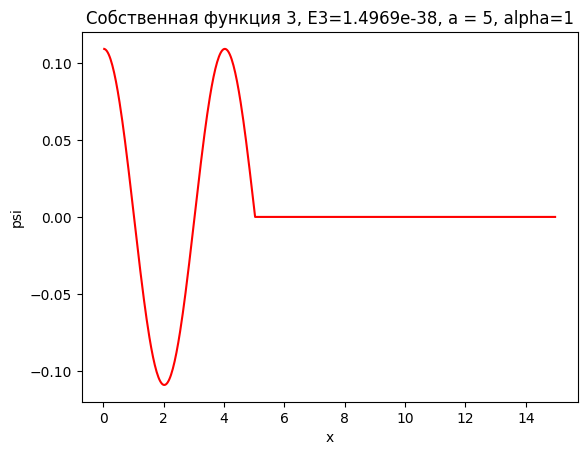

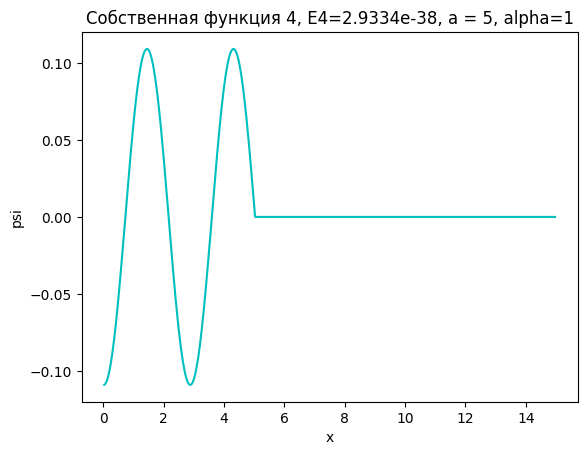

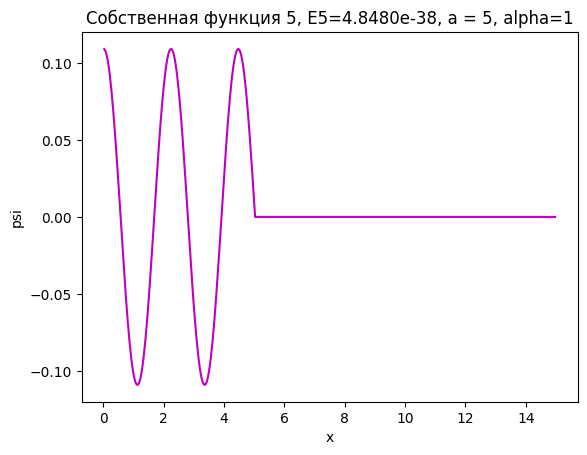

In [133]:
# Смотрим, как меняется собственное значение при фиксированном значении alpha и разных значениях параметра a
import numpy as np
from scipy.linalg import eig
from scipy.constants import hbar, electron_mass
import matplotlib.pyplot as plt

m = electron_mass

coef1 = 2*m/hbar**2
coef2 = hbar**2/(2*m)

a = [0.1, 0.5, 1, 2, 5]
alpha = 1

neigen = 5

def q(x, i):
    if x < 0: return np.inf
    elif x > a[i]: return coef1 * alpha * (x - a[i])
    else : return 0


for k in range(5):

    b = 3 * a[k]
    N = 500
    h = b / (N+1)

    A = np.zeros((N,N))
    for i in range(N):
        A[i,i] = 2/h**2 + q((i+1)*h, k)
        if i > 0:
            A[i,i-1] = -1/h**2
        if i < N-1:
            A[i,i+1] = -1/h**2

    A[0,0] = 1/h**2
    A[N-1,N-1] = 1/h**2

    eigenvalues, eigenvectors = eig(A)

    idx = eigenvalues.argsort()
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:,idx]

    eigenvalues = eigenvalues[:neigen].real * coef2
    eigenvectors = eigenvectors[:,:neigen]

    for i in range(neigen):
        eigenvectors[:,i] /= np.sqrt(np.sum(eigenvectors[:,i]**2))

    x = np.linspace(0, b, N+2)
    colors = ['y', 'g', 'r', 'c', 'm']
    for i in range(neigen):
        plt.figure()
        plt.plot(x[1:-1], eigenvectors[:,i], color=colors[i % len(colors)])
        plt.title(f'Собственная функция {i+1}, E{i+1}={eigenvalues[i]:.4e}, a = {a[k]}, alpha={alpha}')
        plt.xlabel('x')
        plt.ylabel('psi')
        plt.show()